In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

## plotData

In [48]:
def plotData(x,y):
    y_p=y[y>0]
    y_n=y[y<0]
    plt.scatter(x[y>0],y_p,marker='+',s=100)
    plt.scatter(x[y<0],y_n,marker='o',s=70)

In [49]:
x=np.array(range(0,10))
y=np.random.randint(-50,50,10)

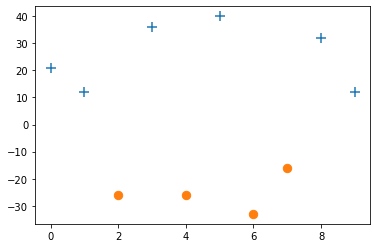

In [50]:
plotData(x,y)

## sigmoid

In [20]:
def sigmoid(z):
    g=np.divide(1,(1+np.exp(-z)))
    return g

In [71]:
a=np.array([[1,2,3],[4,5,6]])
sigmoid(a)

array([[0.73105858, 0.88079708, 0.95257413],
       [0.98201379, 0.99330715, 0.99752738]])

## costFunction

In [184]:
def costFunction(theta,x,y):
    m=y.shape[1]
    x=x.transpose()
    y=y.transpose()
    z=(np.dot(x,theta)).reshape(m,1)
    h_x=sigmoid(z)
    J=(1/m)*sum((-y*np.log(h_x))-((1-y)*np.log(1-h_x)))
    grad=(1/m)*(np.dot(x.transpose(),(h_x-y)))
    return J,grad

In [233]:
x=np.array([[np.random.randint(0,10,10)],[np.random.randint(0,10,10)]])
y=np.array([np.random.randint(0,10,10)])
theta=np.array([[1],[1]])

In [186]:
[J,grad]=costFunction(theta,x,y)

## predict method 1

In [380]:
def predict(theta,x):
    x=x.transpose()
    h_x=sigmoid(np.dot(x,theta))
    for i in range(x.shape[0]):
        if h_x[i]>=0.5:
            p[i]=1
        else:
            p[i]=0
    return p
x=np.array([[np.random.uniform(-1,1,4)],[np.random.uniform(-1,1,4)]])
theta=np.array([[1],[1]])
predict(theta,x)

array([0., 1., 0., 0.])

## predict method 2

In [382]:
def predict(theta,x):
    x=x.transpose()
    h_x=sigmoid(np.dot(x,theta))
    p=(np.round(h_x,0)).reshape(1,x.shape[0])
    return p
x=np.array([[np.random.uniform(-1,1,4)],[np.random.uniform(-1,1,4)]])
theta=np.array([[0],[1]])
predict(theta,x)

array([[0., 0., 0., 1.]])

## costFunctionReg

In [219]:
x=np.array([[np.random.randint(0,10,10)],[np.random.randint(0,10,10)]])
y=np.array([np.random.randint(0,10,10)])
lambbda=2
theta=np.array([[1],[1]])
def costFunctionReg(x,y,theta,lambbda):
    m=y.shape[1]
    n=theta.shape[0]
    x=x.reshape(m,n)
    y=y.reshape(m,1)
    z=(np.dot(x,theta))
    h_x=sigmoid(z).reshape(m,1)
    grad=np.zeros(len(theta))
    reg_term=np.divide(lambbda,(2*m))*np.sum(np.power(theta[1:],2))
    J=(1/m)*sum((-y*np.log(h_x))-((1-y)*np.log(1-h_x)))+reg_term
    grad[0]=(1/m)*np.dot(x[:,0],(h_x-y))
    grad[1]=(1/m)*np.dot(x[:,1],(h_x-y))+(lambbda/m)*theta[1]
    return J,grad

In [218]:
costFunctionReg(x,y,theta,lambbda)

(array([-42.16756668]), array([-27.13231479, -15.1391975 ]))